In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [69]:
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

def plot_ellipse(x, y, c):
    nstd = 2
    ax = plt.subplot(111)

    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color=c)
    ell.set_facecolor('none')
    ax.add_artist(ell)
    #plt.scatter(x, y)

In [55]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]

In [38]:
replicas_files = sorted(glob.glob("replicas/*"))

In [39]:
len(replicas_files)

25

In [40]:
replicas = np.zeros((25, 113, 60), dtype=np.float)

In [41]:
for i, r in enumerate(replicas_files):
    data = pd.read_csv(r, sep=";", index_col=0) 
    x_out = np.array(data[data.columns[1:61]])
    replicas[i] = x_out

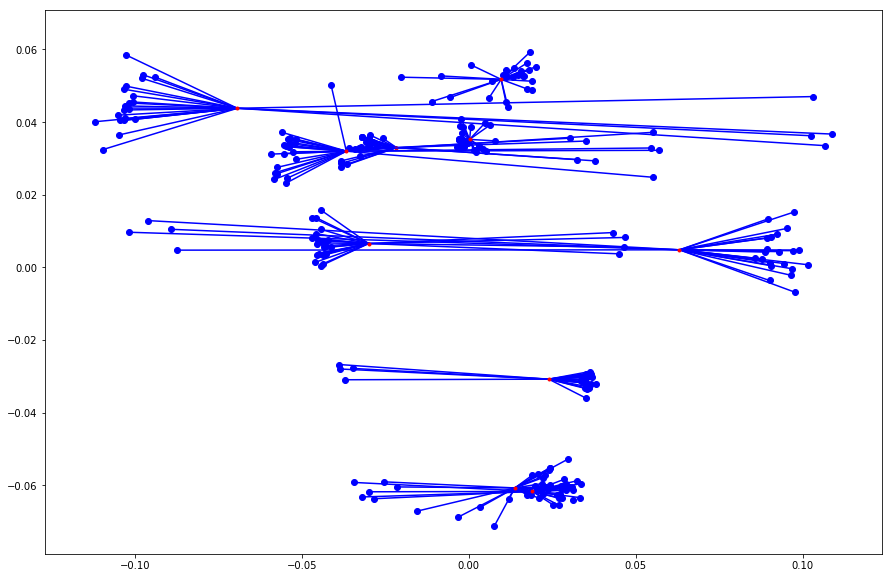

In [89]:
for i in range(70, 80):
    plt.scatter(replicas[:,i][:,0],replicas[:,i][:,1], marker="o", c="b")
    centroids = replicas[:, i, [0,1]].mean(axis=0)
    for j in range(25)[1:]:
         plt.plot([replicas[:,i][j][0], centroids[0]],[replicas[:,i][j][1], centroids[1]],"b-")
    plt.plot(centroids[0], centroids[1], ".r")
    #plot_ellipse(replicas[:,i][:,0], replicas[:,i][:,1], "g" )
#plt.scatter(replicas[0][:, 0], replicas[0][:, 1], marker="o", c="r")

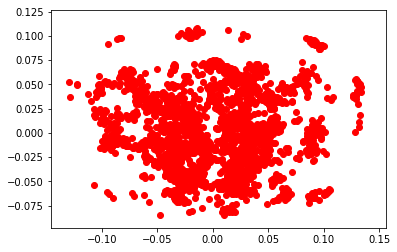

In [8]:
ids = np.array(data["id"])

In [9]:
replicas.shape

(25, 113, 60)

In [10]:
centroids = replicas[:, :, [range(5)]].mean(axis=0)

In [11]:
centroid = replicas.reshape(-1, 60).mean(axis=1)

In [12]:
centroids = centroids.reshape(113, 5)

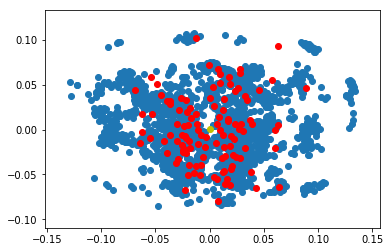

In [13]:
plt.scatter(replicas[:, :, 0], replicas[:, :, 1], marker="o")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", c="r")
plt.scatter(centroid[0], centroid[1], c="y")

In [14]:
from scipy.spatial import distance

In [15]:
distances = []
for p in replicas.reshape(-1, 60):
    distances.append(distance.euclidean(p[0:5], centroid[0:5]))

In [16]:
np.mean(distances)

0.068123976467726818

In [17]:
distances_total = []
#dist = []
for p in replicas:
    dist = []
    for i, j in zip(p, centroids):
        dist.append(distance.euclidean(i[0:5], j[0:5]))
    distances_total.append(dist)
    

In [18]:
distances_total = np.array(distances_total)

In [19]:
distances_total.shape

(25, 113)

In [20]:
distances_total.mean(axis=0)

array([ 0.03358888,  0.05714583,  0.01311198,  0.01950591,  0.06066732,
        0.04402573,  0.03399211,  0.06582847,  0.04730482,  0.02667416,
        0.02451162,  0.0418739 ,  0.02479611,  0.03683903,  0.04284065,
        0.04675278,  0.03370261,  0.08084456,  0.05056175,  0.02392081,
        0.03952865,  0.05076229,  0.03767344,  0.06809605,  0.04233694,
        0.01811126,  0.04448505,  0.02560344,  0.0360804 ,  0.05605956,
        0.04654324,  0.03844667,  0.04524525,  0.05683879,  0.05080661,
        0.0259473 ,  0.0620517 ,  0.02828678,  0.03517568,  0.0407168 ,
        0.03480925,  0.0639269 ,  0.0362406 ,  0.02374121,  0.07825655,
        0.02758393,  0.03185849,  0.01966934,  0.03052516,  0.03422883,
        0.09489992,  0.01997497,  0.02771861,  0.04224084,  0.05291513,
        0.01235553,  0.03029517,  0.01756876,  0.03764777,  0.05968332,
        0.04835702,  0.05893218,  0.01376323,  0.04056474,  0.02513973,
        0.03746619,  0.04708374,  0.05979181,  0.03780306,  0.05

In [21]:
np.mean(distances_total.mean(axis=0))

0.040784059219404332

In [22]:
replicas.shape

(25, 113, 60)

In [23]:
df = pd.DataFrame()

In [24]:
df["id"] = ids.tolist() * 25

In [25]:
replicas = replicas.reshape(-1, 60)

In [26]:
for i in np.arange(60):
    df["pc-{}".format(i+1)] = replicas[:, i]

In [27]:
df = df.sort_values(["id"])

In [28]:
df = df.reset_index(drop=True)

In [29]:
df.to_csv("replicas_total.csv" ,sep=";", index=True)

In [30]:
df

id      pc-1      pc-2      pc-3      pc-4      pc-5      pc-6  \
0       1 -0.020506  0.006703 -0.001486  0.054302 -0.037791 -0.004208   
1       1 -0.028628  0.004603 -0.012440  0.057339  0.028657  0.021721   
2       1 -0.025876  0.005040  0.010049  0.061784 -0.031020  0.007872   
3       1 -0.026144  0.006214  0.012654  0.060046 -0.032466  0.008953   
4       1 -0.027821  0.007342 -0.006002  0.063306 -0.024864  0.014167   
5       1 -0.034785  0.005470 -0.021200  0.052784 -0.019752  0.019527   
6       1  0.016468  0.002006 -0.003122  0.056010 -0.035703  0.002768   
7       1 -0.030874  0.008028  0.009175  0.069036  0.023792 -0.008647   
8       1 -0.024063  0.005062  0.012652  0.052746  0.039687 -0.009753   
9       1 -0.025807  0.006716  0.006457  0.061398 -0.031423  0.005694   
10      1 -0.026344  0.001684 -0.006568  0.059254 -0.036850  0.001704   
11      1 -0.036962  0.004344  0.017465  0.050909 -0.025553  0.017890   
12      1  0.027643  0.006579 -0.006260  0.063386  0.020659  0.016869   
13      1 -0.034883  0.005631 -0.011756  0.052508  0.025515  0.015014   
14      1 -0.026118  0.005143 -0.015776  0.062247 -0.034635  0.011586   
15      1 -0.030572  0.001794 -0.022183  0.045381 -0.027907  0.012324   
16      1  0.027440  0.002912  0.009534  0.051482  0.039087 -0.001922   
17      1 -0.020252  0.003596  0.004344  0.052808 -0.036521  0.002025   
18      1 -0.022176  0.006996  0.006916  0.059086 -0.027705  0.004840   
19      1 -0.032164  0.005092  0.012858  0.057029  0.029621  0.015364   
20      1 -0.032869  0.004299  0.013385  0.057179 -0.025568  0.011927   
21      1 -0.028687  0.006173 -0.016207  0.052226 -0.030765  0.012282   
22      1 -0.028487  0.006964 -0.015447  0.055945 -0.037447  0.003611   
23      1 -0.030166  0.005219 -0.022220  0.050195 -0.032441  0.015509   
24      1  0.028926  0.002869 -0.018586  0.062713  0.027186  0.002484   
25      2  0.032646 -0.010039 -0.002338 -0.004400 -0.041792  0.017202   
26      2 -0.031586 -0.008494 -0.005425  0.000803  0.033854 -0.000124   
27      2  0.034122 -0.010811  0.004445 -0.000505 -0.038293  0.008045   
28      2  0.039885 -0.018057 -0.015223 -0.017250  0.041436  0.020240   
29      2  0.035977 -0.013172  0.007324  0.000909 -0.041127  0.015334   
...   ...       ...       ...       ...       ...       ...       ...   
2795  153  0.020914 -0.020159 -0.034700 -0.006656  0.006743 -0.023716   
2796  153  0.020212 -0.020679 -0.037539 -0.009750 -0.005163  0.023836   
2797  153  0.020432 -0.018817 -0.043751 -0.013919  0.003962 -0.023740   
2798  153  0.020040 -0.022733  0.041927 -0.009639 -0.003258 -0.021238   
2799  153 -0.022055 -0.018978 -0.032678 -0.000438 -0.012440  0.021874   
2800  154 -0.025524 -0.010143 -0.010871  0.008870 -0.029398  0.008796   
2801  154  0.027552 -0.012371  0.016150  0.002247  0.024655  0.007199   
2802  154 -0.029786 -0.013818  0.000229  0.009024  0.020541  0.014074   
2803  154 -0.024292 -0.010322  0.012730  0.009874 -0.027930  0.000778   
2804  154 -0.028171 -0.013195  0.007077  0.006605 -0.031742 -0.001071   
2805  154 -0.030010 -0.015314 -0.005109  0.005197 -0.023602  0.018611   
2806  154 -0.029568 -0.012217  0.008926  0.007939 -0.028457  0.007822   
2807  154 -0.029137 -0.012462 -0.003177  0.006263 -0.025391  0.003358   
2808  154 -0.029324 -0.015682 -0.000027  0.005505 -0.026554 -0.007871   
2809  154 -0.027950 -0.011972 -0.006019  0.008732 -0.030073 -0.004072   
2810  154 -0.024880 -0.010048 -0.012586  0.005596 -0.026388  0.003303   
2811  154 -0.025869 -0.010549 -0.010843  0.005857 -0.029137 -0.002320   
2812  154 -0.029669 -0.011935 -0.005958  0.013190  0.024604  0.003226   
2813  154 -0.028981 -0.014971 -0.003066  0.011772  0.024458  0.007986   
2814  154  0.026749 -0.016172  0.005210  0.007275  0.022460  0.016235   
2815  154 -0.031173 -0.015843 -0.000857  0.008324  0.023574  0.005785   
2816  154  0.029050 -0.011233 -0.011913  0.004339  0.025678  0.009989   
2817  154 -0.027201 -0.011242  0.011744  0.003072 -0.027491 -0.00